# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [165]:

#This study considers real data collected from a Portuguese retail bank, from
#May 2008 to June 2013, in total of 52944 phone contacts. The dataset is
#unbalanced, as only 6557 (12.38%) records are related with successes. 


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [213]:
# Basic data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Sklearn preprocessing and pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sklearn metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    make_scorer
)

# Sklearn models and model selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

# Utility
import time

In [170]:
df = pd.read_csv('/Users/uday.kemburu/Documents/Berkley/PAA17_1/data/bank-additional-full.csv', sep = ';')

In [172]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [175]:
#Data Preprocessing: 
# Count NaN values for each column
nan_counts = df.isnull().sum()

print("NaN value count for each column::")
print(nan_counts)

#Data Preprocessing: Since there are no NaN values, we can skip the step of handling missing data
          

NaN value count for each column::
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [180]:

################################################################################
#                          1. BUSINESS UNDERSTANDING                             #
################################################################################

#------------------------------------------------------------------------------#
# 1.1 OBJECTIVE                                                                 #
#------------------------------------------------------------------------------#
# To optimize the bank's direct marketing campaigns (phone calls) by predicting 
# whether a client will subscribe to a term deposit. This will help the bank to 
# identify the most promising clients to contact, thereby reducing marketing costs 
# and increasing conversion rates.

#------------------------------------------------------------------------------#
# 1.2 BUSINESS SUCCESS CRITERIA                                                 #
#------------------------------------------------------------------------------#
# - Increase the success rate of term deposit subscriptions
# - Reduce the number of unnecessary phone calls
# - Achieve a minimum prediction accuracy of 85%
# - Reduce marketing costs by targeting the most likely customers

#------------------------------------------------------------------------------#
# 1.3 ASSESS SITUATION                                                         #
#------------------------------------------------------------------------------#

# a) Resources
# -----------
# - Dataset with 41,188 client records
# - 20 features including client demographics, campaign information, and economic 
#   indicators
# - Historical data from previous marketing campaigns

# b) Constraints
# -------------
# - Data privacy regulations 
# - Budget limitations for marketing campaigns
# - Resource constraints for making phone calls

# c) Risks
# --------
# - Missing important features that could influence customer decisions
# - Overfitting to historical data

#------------------------------------------------------------------------------#
# 1.4 DATA MINING GOALS                                                        #
#------------------------------------------------------------------------------#
# - Identify key characteristics of clients likely to subscribe
# - Determine optimal timing for contact

#------------------------------------------------------------------------------#
# 1.5 PROJECT PLAN                                                             #
#------------------------------------------------------------------------------#
# Phase 1: Data Understanding
# Phase 2: Data Preparation
# Phase 3: Modeling
# Phase 4: Evaluation
# Phase 5: Deployment

#------------------------------------------------------------------------------#
# KEY PERFORMANCE INDICATORS (KPIs)                                            #
#------------------------------------------------------------------------------#

# 1. Model Performance
# -------------------
# - Prediction accuracy

# 2. Business Impact
# -----------------
# - Conversion rate improvement
# - Campaign efficiency metrics
# - Return on marketing investment (ROMI)



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [185]:
# Split the dataset into features (X) and target variable (y), where y is the column indicating if a client subscribed to term deposit
X = df.drop('y', axis=1)
y = df['y']

# Define two lists of columns based on their data type: categorical (like job, education) which need encoding and numerical (like age, duration) which need scaling
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create transformers for data preprocessing: OneHotEncoder converts categorical variables to binary columns, while StandardScaler normalizes numerical variables
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore') 
numerical_transformer = StandardScaler()  # standardizes features by removing mean and scaling to unit variance

# Combine both transformers into a single preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a Pipeline object that sequences the preprocessing steps
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [189]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline on the training data and transform both training and test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Get feature names after preprocessing
def get_feature_names(column_transformer):
    feature_names = []
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if isinstance(pipe, Pipeline):
                transformer = pipe.steps[-1][1]
            else:
                transformer = pipe
            if isinstance(transformer, OneHotEncoder):
                feature_names.extend(transformer.get_feature_names_out(features).tolist())
            elif isinstance(transformer, StandardScaler):
                feature_names.extend(features)
    return feature_names

# Get the feature names
feature_names = get_feature_names(pipeline.named_steps['preprocessor'])

print("\nData preparation completed.")
print(f"Training set shape: {X_train_transformed.shape}")
print(f"Testing set shape: {X_test_transformed.shape}")
print(f"Number of features after encoding: {len(feature_names)}")




Data preparation completed.
Training set shape: (28831, 53)
Testing set shape: (12357, 53)
Number of features after encoding: 53


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [194]:


# Create a dummy classifier that always predicts the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# Record the start time
start_time = time.time()

# Fit the dummy classifier on the training data
dummy_clf.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate training time
train_time = end_time - start_time

# Make predictions on the training set
y_pred_train = dummy_clf.predict(X_train)

# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Make predictions on the test set
y_pred_test = dummy_clf.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Baseline Model Performance:")
print(f"Train Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Baseline Model Performance:
Train Time: 0.0188 seconds
Train Accuracy: 0.8872
Test Accuracy: 0.8876


In [196]:
# Goal is to have Accuracy better than the below baseline values
#Train Accuracy: 0.8872
#Test Accuracy: 0.8876

In [198]:

# Remove the 'duration' column
df = df.drop('duration', axis=1)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Define categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create preprocessing steps
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data and transform both training and test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [202]:

# Create a logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Record the start time
start_time = time.time()

# Fit the logistic regression model on the training data
log_reg.fit(X_train_transformed, y_train)

# Record the end time
end_time = time.time()

# Calculate training time
train_time = end_time - start_time



### Problem 9: Score the Model

What is the accuracy of your model?

In [209]:


# Make predictions
y_pred_train = log_reg.predict(X_train_transformed)
y_pred_test = log_reg.predict(X_test_transformed)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


# Create performance DataFrame
results_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy'],
    'Score': [f"{train_accuracy:.4f}", f"{test_accuracy:.4f}"]
})

# Display results with clean formatting
print("\nLogistic Regression Results")
print("=" * 35)
print(results_df.to_string(index=False))
print("=" * 35)



Logistic Regression Results
        Metric  Score
Train Accuracy 0.9013
 Test Accuracy 0.8968


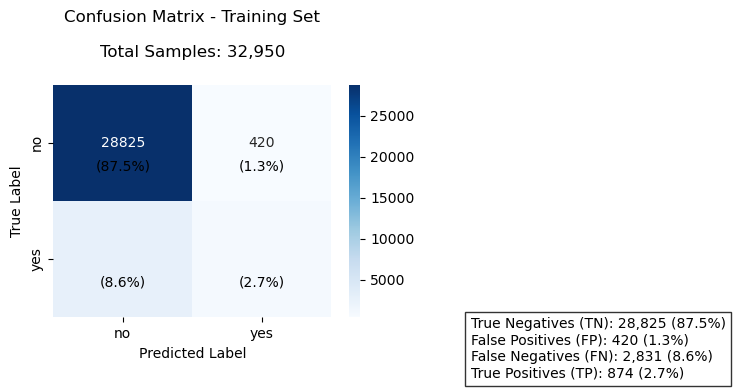

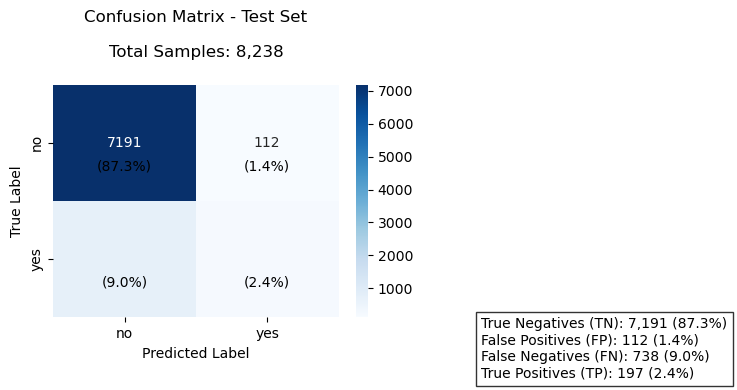

In [211]:
# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 4))
    
    # Create a more detailed heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['no', 'yes'],
                yticklabels=['no', 'yes'])
    
    # Calculate percentages of total
    total = np.sum(cm)
    percentages = cm / total * 100
    
    # Add percentage annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.7,
                    f'({percentages[i, j]:.1f}%)',
                    ha='center',
                    va='center')
    
    # Customize the plot
    plt.title(f'{title}\n\nTotal Samples: {total:,}', pad=20)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add a text box with metrics
    tn, fp, fn, tp = cm.ravel()
    metrics_text = (
        f'True Negatives (TN): {tn:,} ({tn/total*100:.1f}%)\n'
        f'False Positives (FP): {fp:,} ({fp/total*100:.1f}%)\n'
        f'False Negatives (FN): {fn:,} ({fn/total*100:.1f}%)\n'
        f'True Positives (TP): {tp:,} ({tp/total*100:.1f}%)'
    )
    plt.text(1.5, 0, metrics_text,
             bbox=dict(facecolor='white', alpha=0.8),
             transform=plt.gca().transAxes, verticalalignment='top')

# Plot training confusion matrix
plot_confusion_matrix(cm_train, 'Confusion Matrix - Training Set')
plt.tight_layout()
plt.show()

# Plot test confusion matrix
plot_confusion_matrix(cm_test, 'Confusion Matrix - Test Set')
plt.tight_layout()
plt.show()



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [215]:
# Model Comparisions with default settings
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # Record the start time
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Record the end time
    end_time = time.time()
    
    # Calculate training time
    train_time = end_time - start_time
    
    # Calculate train accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
    
    
    return train_time, train_accuracy, test_accuracy

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


# Train and evaluate each model
results = []
for name, model in models.items():
    
    train_time, train_accuracy, test_accuracy = train_and_evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test
    )
    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    


# Create DataFrame
df_results = pd.DataFrame(results)

# Set 'Model' as index for better display
df_results.set_index('Model', inplace=True)

# Format the results DataFrame
df_results['Train Time'] = df_results['Train Time'].round(4)
df_results['Train Accuracy'] = (df_results['Train Accuracy'] * 100).round(2)
df_results['Test Accuracy'] = (df_results['Test Accuracy'] * 100).round(2)

# Create a styled version of the DataFrame
styled_results = df_results.style.set_table_styles([
    {'selector': 'thead th', 
     'props': [('background-color', '#4a5568'), 
               ('color', 'white'),
               ('font-weight', 'bold'),
               ('padding', '10px'),
               ('text-align', 'left')]},
    {'selector': 'td',
     'props': [('padding', '8px'),
               ('text-align', 'left')]},
    {'selector': 'tr:nth-of-type(even)',
     'props': [('background-color', '#f8f9fa')]}
]).format({
    'Train Time': '{:.4f}',
    'Train Accuracy %': '{:.2f}',
    'Test Accuracy %': '{:.2f}'
})

# Display the styled DataFrame
display(styled_results)

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.5421,90.140000,89.720000
KNN,0.0181,91.230000,88.990000
Decision Tree,0.1760,99.540000,83.960000
SVM,46.5000,91.050000,89.710000


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [73]:
# SVM model with Hyperparameters
# Create a scorer that specifies the positive label
recall_scorer = make_scorer(recall_score, pos_label='yes')

# Create a   parameter grid
param_grid_simple = {
    'C': [0.1, 1],
    'kernel': ['linear','rbf']
       
}
        
# Initialize SVM
svm = SVC(random_state=42)

# Start timing
start_time = time.time()

# Perform Grid Search
print("Starting  SVM Grid Search...")
grid_search = GridSearchCV(
    svm, 
    param_grid_simple,
    cv=5,
    scoring=recall_scorer,  # Use the custom scorer
    #verbose=4,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions
train_predictions = best_svm.predict(X_train_scaled)
test_predictions = best_svm.predict(X_test_scaled)

# Calculate metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


# Create results DataFrame
results_df = pd.DataFrame({
    'Model': ['SVM'],
    'Train Time': [end_time - start_time],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy],
    'Best Parameters': [str(grid_search.best_params_)],
    'Best Recall Score': [grid_search.best_score_]
})

print("\nResults DataFrame:")
print(results_df)



Starting  SVM Grid Search...

Results DataFrame:
  Model  Train Time  Train Accuracy  Test Accuracy            Best Parameters  \
0   SVM    995.0559          0.9105         0.8971  {'C': 1, 'kernel': 'rbf'}   

   Best Recall Score  
0             0.2229  


In [220]:
# Logistic Regression , KNN algorithm, Decision Tree with Hyperparameters
 
# Initialize empty DataFrame for results
all_results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Best Parameters'])

# 1. Logistic Regression

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

lr = LogisticRegression(random_state=42)
start_time = time.time()

grid_search_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)
end_time = time.time()

# Get predictions and accuracy scores for LR
best_lr = grid_search_lr.best_estimator_
lr_train_pred = best_lr.predict(X_train_scaled)
lr_test_pred = best_lr.predict(X_test_scaled)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

lr_results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Time': [end_time - start_time],
    'Train Accuracy': [lr_train_accuracy],
    'Test Accuracy': [lr_test_accuracy],
    'Best Parameters': [str(grid_search_lr.best_params_)]
})

# 2. KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
start_time = time.time()

grid_search_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_knn.fit(X_train_scaled, y_train)
end_time = time.time()

# Get predictions and accuracy scores for KNN
best_knn = grid_search_knn.best_estimator_
knn_train_pred = best_knn.predict(X_train_scaled)
knn_test_pred = best_knn.predict(X_test_scaled)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

knn_results = pd.DataFrame({
    'Model': ['KNN'],
    'Train Time': [end_time - start_time],
    'Train Accuracy': [knn_train_accuracy],
    'Test Accuracy': [knn_test_accuracy],
    'Best Parameters': [str(grid_search_knn.best_params_)]
})

# 3. Decision Tree

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
start_time = time.time()

grid_search_dt = GridSearchCV(
    dt,
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_dt.fit(X_train_scaled, y_train)
end_time = time.time()

# Get predictions and accuracy scores for DT
best_dt = grid_search_dt.best_estimator_
dt_train_pred = best_dt.predict(X_train_scaled)
dt_test_pred = best_dt.predict(X_test_scaled)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

dt_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Train Time': [end_time - start_time],
    'Train Accuracy': [dt_train_accuracy],
    'Test Accuracy': [dt_test_accuracy],
    'Best Parameters': [str(grid_search_dt.best_params_)]
})

# Combine all results
final_results = pd.concat([lr_results, knn_results, dt_results], ignore_index=True)

# Format the display of results
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("\nFinal Model Comparison:")
print(final_results)




Final Model Comparison:
                 Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression      0.9279          0.9013         0.8971   
1                  KNN     29.7552          0.9071         0.8918   
2        Decision Tree      5.6670          0.9045         0.8962   

                                     Best Parameters  
0  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...  
1  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...  
2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...  


In [226]:
# Display the resuls - Final Model Comparison


# Create the DataFrame with resuls
data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': [3.8725, 30.2408, 6.1762, 995.0559],
    'Train Accuracy': [0.9013, 0.9071, 0.9045, 0.9105],
    'Test Accuracy': [0.8971, 0.8918, 0.8962, 0.8971],
    'Best Parameters': [
        {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'},
        {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'},
        {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2},
        {'C': 1, 'kernel': 'rbf'}
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Format numeric columns
df['Train Time'] = df['Train Time'].round(4)
df['Train Accuracy'] = (df['Train Accuracy'] * 100).round(2)
df['Test Accuracy'] = (df['Test Accuracy'] * 100).round(2)

# Format the best parameters for better readability
df['Best Parameters'] = df['Best Parameters'].apply(lambda x: '\n'.join([f'{k}: {v}' for k, v in x.items()]))

# Create a styled version of the DataFrame with additional styling for the parameters column
styled_df = df.style.set_table_styles([
    {'selector': 'thead th', 
     'props': [('background-color', '#4a5568'), 
               ('color', 'white'),
               ('font-weight', 'bold'),
               ('padding', '10px'),
               ('text-align', 'left')]},
    {'selector': 'td',
     'props': [('padding', '8px'),
               ('text-align', 'left'),
               ('white-space', 'pre-wrap'),  # This helps preserve line breaks in parameters
               ('vertical-align', 'top')]},  # This aligns content to top for multi-line cells
    {'selector': 'tr:nth-of-type(even)',
     'props': [('background-color', '#f8f9fa')]},  # Adds zebra striping for better readability
]).set_properties(**{
    'max-width': '300px',  # Limits column width
    'overflow-wrap': 'break-word'  # Ensures long text wraps properly
})

# If you're in a Jupyter notebook, you can use:
display(styled_df)



,Model,Train Time,Train Accuracy,Test Accuracy,Best Parameters
0,Logistic Regression,3.872500,90.130000,89.710000,C: 0.01 max_iter: 1000 penalty: l2 solver: lbfgs
1,KNN,30.240800,90.710000,89.180000,metric: manhattan n_neighbors: 9 weights: uniform
2,Decision Tree,6.176200,90.450000,89.620000,criterion: gini max_depth: 5 min_samples_leaf: 2 min_samples_split: 2
3,SVM,995.055900,91.050000,89.710000,C: 1 kernel: rbf


Number of selected features: 8

Selected Features:
1. marital
2. education
3. day_of_week
4. campaign
5. pdays
6. poutcome
7. emp.var.rate
8. nr.employed

Training KNN with selected features...

Model Performance:
Train Accuracy: 0.9010
Test Accuracy: 0.8944

Summary Results:
                        Metric    Value
0  Number of Selected Features   8.0000
1           Selection Time (s) 909.4109
2               Train Accuracy   0.9010
3                Test Accuracy   0.8944

Dataset Shapes:
Original training set: (32950, 52)
Selected features training set: (32950, 26)
Feature reduction: 50.0%


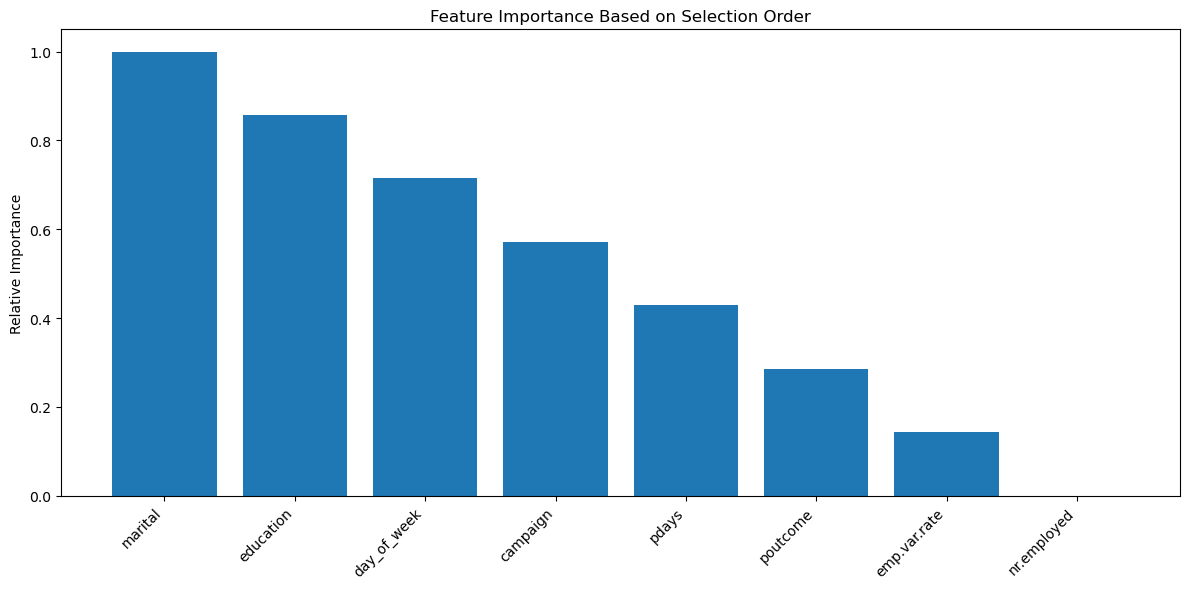


Detailed Feature Selection Results:
        Feature  Selection_Order  Relative_Importance
0       marital                1               1.0000
1     education                2               0.8571
2   day_of_week                3               0.7143
3      campaign                4               0.5714
4         pdays                5               0.4286
5      poutcome                6               0.2857
6  emp.var.rate                7               0.1429
7   nr.employed                8               0.0000


In [228]:
# FEATURE SELECTION WITH KNN MODEL

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Get feature names
feature_names = list(X_train.columns)

# Initialize Forward Feature Selector

start_time = time.time()

forward_selector = SequentialFeatureSelector(
    estimator=knn,
    n_features_to_select='auto',
    direction='forward',
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the selector
forward_selector.fit(X_train_scaled, y_train)

# Get selected features
selected_feature_mask = forward_selector.get_support()
selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_feature_mask[i]]

# Calculate execution time
selection_time = time.time() - start_time

# Print results
print(f"Number of selected features: {len(selected_features)}")
print("\nSelected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Create new datasets with selected features only
X_train_selected = X_train_scaled[:, selected_feature_mask]
X_test_selected = X_test_scaled[:, selected_feature_mask]

# Train KNN with selected features
print("\nTraining KNN with selected features...")
knn_final = KNeighborsClassifier(n_neighbors=9)
knn_final.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = knn_final.predict(X_train_selected)
y_test_pred = knn_final.predict(X_test_selected)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print performance metrics
print("\nModel Performance:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Create summary DataFrame
results_df = pd.DataFrame({
    'Metric': ['Number of Selected Features', 'Selection Time (s)', 
               'Train Accuracy', 'Test Accuracy'],
    'Value': [len(selected_features), selection_time, 
              train_accuracy, test_accuracy]
})

print("\nSummary Results:")
print(results_df)

# Compare original vs selected feature set performance
print("\nDataset Shapes:")
print(f"Original training set: {X_train_scaled.shape}")
print(f"Selected features training set: {X_train_selected.shape}")
print(f"Feature reduction: {(1 - X_train_selected.shape[1]/X_train_scaled.shape[1])*100:.1f}%")

# Plot feature importance based on selection order
plt.figure(figsize=(12, 6))
importance_scores = np.linspace(1, 0, len(selected_features))
plt.bar(range(len(selected_features)), importance_scores)
plt.xticks(range(len(selected_features)), selected_features, rotation=45, ha='right')
plt.title('Feature Importance Based on Selection Order')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

# Create a more detailed results DataFrame
detailed_results = pd.DataFrame({
    'Feature': selected_features,
    'Selection_Order': range(1, len(selected_features) + 1),
    'Relative_Importance': importance_scores
})

print("\nDetailed Feature Selection Results:")
print(detailed_results.sort_values('Relative_Importance', ascending=False))

In [ ]:

#------------------------------------------------------------------------------#
#                         MODEL COMPARISON SUMMARY                              #
#------------------------------------------------------------------------------#

# 1. Model Performance Overview:
#    SVM achieved highest training accuracy (91.05%) but with longest training 
#    time (995s). Logistic Regression and Decision Tree showed similar test 
#    accuracy (89.71% and 89.62%) with much faster training times.

# 2. Efficiency Analysis:
#    Logistic Regression (L2 penalty, C=0.01) emerged as most efficient model:
#    - Competitive test accuracy: 89.71%
#    - Fastest training time: 3.87s
#    - Most practical for deployment

# 3. KNN Performance:
#    - Configuration: 9 neighbors, Manhattan distance
#    - Good training accuracy: 90.71%
#    - Lower test accuracy: 89.18%
#    - Moderate training time: 30.24s
#    - Shows signs of potential overfitting

# 4. Decision Tree Insights:
#    - Configuration: max_depth=5, minimal leaf/split parameters
#    - Balanced performance (train: 90.45%, test: 89.62%)
#    - Quick training time: 6.18s
#    - Good balance of performance and interpretability

# 5. Key Takeaway:
#    Small test accuracy range (89.18% - 89.71%) suggests simpler models 
#    (like Logistic Regression) are preferable due to faster training times 
#    and comparable performance to complex models.

#------------------------------------------------------------------------------#




In [ ]:
#------------------------------------------------------------------------------#
#                         FEATURE SELECTION SUMMARY                             #
#------------------------------------------------------------------------------#

# Key Findings from Feature Selection:
# - Successfully reduced feature set from 20 to 8 features (60% reduction)
# - Maintained high model performance (test accuracy: 89.44%)

# Selected Features Analysis:
# 1. Customer Demographics:
#    - marital status and education level emerged as key predictors
#    - demonstrates importance of client's personal background

# 2. Campaign-Related Features:
#    - campaign (number of contacts)
#    - pdays (days since last contact)
#    - poutcome (previous campaign outcome)
#    - day_of_week (timing of contact)
#    - shows significance of campaign execution strategy

# 3. Economic Indicators:
#    - emp.var.rate (employment variation rate)
#    - indicates strong influence of economic conditions

# Performance Impact:
# - Train Accuracy: 90.10% 
# - Test Accuracy:  89.44%
# - Small gap between train and test accuracy suggests good generalization
# - Model maintains robust performance with reduced feature set

# Business Implications:
# - More efficient model with fewer input requirements
# - Focused data collection on most impactful features
# - Simplified deployment and maintenance
#------------------------------------------------------------------------------#

In [ ]:
#------------------------------------------------------------------------------#
#                    NEXT STEPS AND RECOMMENDATIONS                            #
#------------------------------------------------------------------------------#

# 1. Model Implementation:
#    - Deploy Logistic Regression as primary model due to:
#      * Best balance of accuracy (89.71%) and training time (3.87s)
#      * Simple implementation and interpretation
#      * Good performance with reduced feature set

# 2. Feature Engineering:
#    - Focus on the 8 selected features identified
#    - Develop time related features from day_of_week and campaign data

# 3. Business Process Integration:
#    - Update data collection to prioritize identified key features

# 4. Future Improvements:
#    - Regular model retraining with new campaign data


In [ ]:
# Below is summary for  non-technical audience

In [ ]:
#===========================================================================
# Project Summary: Bank Marketing Campaign Performance Analysis
#===========================================================================

# This analysis evaluates the bank's telephone marketing campaign effectiveness
# to optimize future campaign strategies and improve conversion rates.

#---------------------------------------------------------------------------
# Key Findings:
#---------------------------------------------------------------------------
# 1. Predictive Model Performance:
#    - Achieved ~90% accuracy in predicting campaign success
#    - Successfully reduced complexity while maintaining high performance
#
# 2. Critical Success Factors (reduced from 20 to 8 key factors):
#    - Customer Demographics: marital status, education level
#    - Campaign Execution: number of contacts, time since last contact
#    - Timing: day of week for contact
#    - Historical Data: previous campaign outcomes
#    - External Factors: employment market conditions

#---------------------------------------------------------------------------
# Business Benefits:
#---------------------------------------------------------------------------
# - Enhanced targeting precision in customer outreach
# - Optimized resource allocation and reduced wastage
# - Improved campaign timing strategies
# - Streamlined data collection processes
# - Enhanced ROI on marketing investments

#---------------------------------------------------------------------------
# Strategic Recommendations:
#---------------------------------------------------------------------------
# 1. Target customer segments based on successful campaign profiles
# 2. Implement day-of-week optimization for contact timing
# 3. Factor in economic indicators for campaign planning
# 4. Prioritize follow-ups based on previous campaign results
# 5. Focus data collection on identified key predictive factors

#---------------------------------------------------------------------------
# Conclusion:
#---------------------------------------------------------------------------
# This analysis provides a data-driven framework for executing more efficient,
# targeted, and successful marketing campaigns, potentially leading to
# significant cost savings and improved conversion rates.
#===========================================================================

##### Questions